In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("X_train Shape:",X_train.shape)
print("y_train Shape:",y_train.shape)
print("X_test Shape:",X_test.shape)
print("y_test Shape:",y_test.shape)

X_train Shape: (60000, 28, 28)
y_train Shape: (60000,)
X_test Shape: (10000, 28, 28)
y_test Shape: (10000,)


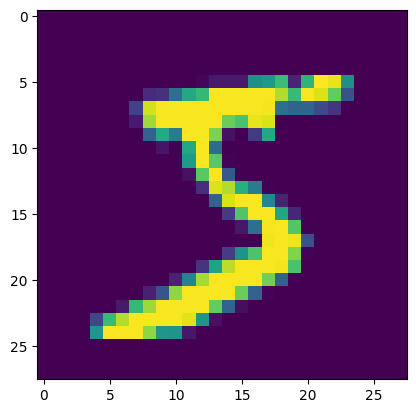

In [9]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [10]:
X_train = X_train/255
X_test = X_test/255

In [23]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(10  ,activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [26]:
history = model.fit(X_train,y_train,epochs = 25,validation_split= 0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8577 - loss: 0.4970 - val_accuracy: 0.9566 - val_loss: 0.1454
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9599 - loss: 0.1337 - val_accuracy: 0.9664 - val_loss: 0.1107
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9745 - loss: 0.0845 - val_accuracy: 0.9733 - val_loss: 0.0902
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9814 - loss: 0.0599 - val_accuracy: 0.9703 - val_loss: 0.0980
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9853 - loss: 0.0457 - val_accuracy: 0.9732 - val_loss: 0.0928
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0338 - val_accuracy: 0.9732 - val_loss: 0.0966
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0290 - val_accuracy: 0.9723 - val_loss: 0.1062
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9925 - loss: 0.0240 - 

In [27]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [28]:
y_pred = y_prob.argmax(axis = 1)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9777

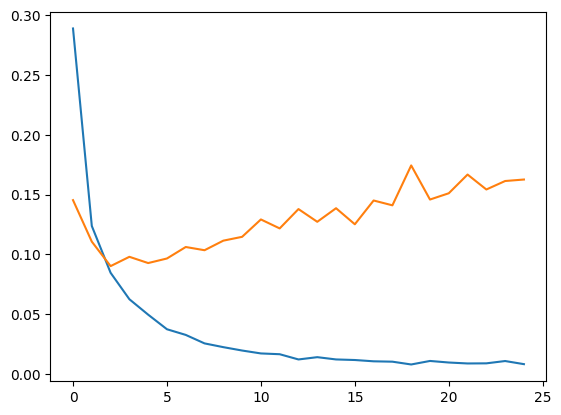

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

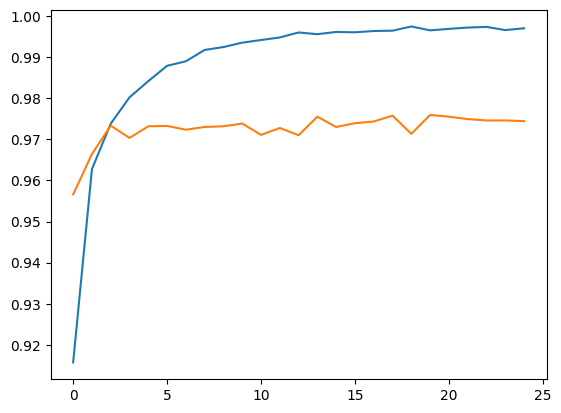

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

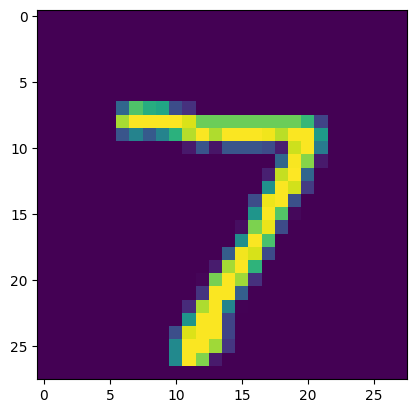

In [40]:
plt.imshow(X_test[0])

In [41]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([7])